# **Application of Sobolev learning via nnodely**

This tutorial implements an simple example of Sobolev learning, the techniques is introduced in the paper titled:

*Sobolev Training for Neural Networks*

(available at https://arxiv.org/pdf/1706.04859)


In [1]:
from nnodely import *
import torch

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>-- nnodely_v1.3.1 --<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


Creation of the network with one input x and two outputs y and dy/dx.

In [2]:
x = Input('x')
y_target = Input('y_target')
dy_dx_target = Input('dy_dx_target')

x_last = x.last()

def parametric_fun(x,a,b,c,d):
    import torch
    return x**3*a+x**2*b+torch.sin(x)*c+d

def dx_parametric_fun(x,a,b,c,d):
    import torch
    return (3*x**2*a)+(2*x*b)+c*torch.cos(x)

fun = ParamFun(parametric_fun)(x_last)
approx_y = Output('y', fun)
approx_dy_dx = Output('dy_dx', Derivate(fun, x_last))

Creation of the Modely model for the Sobolev network


In [3]:
sobolev = Modely(visualizer=TextVisualizer(),seed=1)
sobolev.addModel('model',[approx_dy_dx, approx_y])
# Loss for the value of y
sobolev.addMinimize('err', approx_y, y_target.last())
# Loss for the value of dy/dx
sobolev.addMinimize('sob_err', approx_dy_dx, dy_dx_target.last())
sobolev.neuralizeModel()

================================ nnodely Model =================================
{'Constants': {},
 'Functions': {'FParamFun4': {'code': 'def parametric_fun(x,a,b,c,d):\n'
                                      '    import torch\n'
                                      '    return '
                                      'x**3*a+x**2*b+torch.sin(x)*c+d\n',
                              'in_dim': [{'dim': 1, 'sw': 1}],
                              'map_over_dim': False,
                              'n_input': 1,
                              'name': 'parametric_fun',
                              'params_and_consts': ['FParamFun4a',
                                                    'FParamFun4b',
                                                    'FParamFun4c',
                                                    'FParamFun4d']}},
 'Info': {'SampleTime': 1,
          'nnodely_version': '1.3.1',
          'ns': [1, 0],
          'ntot': 1,
          'num_parameters': 4},
 'Inputs': {'d

Creation of the dataset and loading

In [4]:
# Create the target functions
data_x = torch.rand(10)*200-100
data_a = 0.002
data_b = -0.003
data_c = 15
data_d = 60
dataset = {'x': data_x, 'y_target': parametric_fun(data_x,data_a,data_b,data_c,data_d), 'dy_dx_target': dx_parametric_fun(data_x,data_a,data_b,data_c,data_d)}
sobolev.loadData('data', dataset)

============================ nnodely Model Dataset =============================
Dataset Name:                 data
Number of files:              1
Total number of samples:      10
Shape of dy_dx_target:        (10, 1, 1)
Shape of x:                   (10, 1, 1)
Shape of y_target:            (10, 1, 1)


Function for show the results

In [5]:
# Custom visualizer for results
class FunctionVisualizer(TextVisualizer):
    def showResults(self):
        import torch
        import matplotlib.pyplot as plt
        plt.figure()
        data_x = torch.arange(-20,20,0.1)
        plt.title('Function Data small range')
        plt.plot(data_x, parametric_fun(data_x, data_a, data_b, data_c,data_d), label=f'y_target')
        plt.plot(data_x, dx_parametric_fun(data_x, data_a, data_b, data_c, data_d), label=f'dy_dx_target')
        for key in self.n4m.model_def['Outputs'].keys():
            plt.plot(data_x, self.n4m({'x': data_x})[key],  '-.', label=key)

        plt.grid(True)
        plt.legend(loc='best')
        plt.xlabel('x')
        plt.ylabel('y')

        plt.figure()
        data_x = torch.arange(-100,100,0.1)
        plt.title('Function Data wide range')
        plt.plot(data_x, parametric_fun(data_x, data_a, data_b, data_c,data_d), label=f'y_target')
        plt.plot(data_x, dx_parametric_fun(data_x, data_a, data_b, data_c, data_d), label=f'dy_dx_target')
        for key in self.n4m.model_def['Outputs'].keys():
            plt.plot(data_x, self.n4m({'x': data_x})[key],  '-.', label=key)

        plt.grid(True)
        plt.legend(loc='best')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

res = FunctionVisualizer()
res.set_n4m(sobolev)

Train the model that works only on the value of the derivative of the function

================================ nnodely Model =================================
{'Constants': {},
 'Functions': {'FParamFun4': {'code': 'def parametric_fun(x,a,b,c,d):\n'
                                      '    import torch\n'
                                      '    return '
                                      'x**3*a+x**2*b+torch.sin(x)*c+d\n',
                              'in_dim': [{'dim': 1, 'sw': 1}],
                              'map_over_dim': False,
                              'n_input': 1,
                              'name': 'parametric_fun',
                              'params_and_consts': ['FParamFun4a',
                                                    'FParamFun4b',
                                                    'FParamFun4c',
                                                    'FParamFun4d']}},
 'Info': {'SampleTime': 1,
          'nnodely_version': '1.3.1',
          'ns': [1, 0],
          'ntot': 1,
          'num_parameters': 4},
 'Inputs': {'d

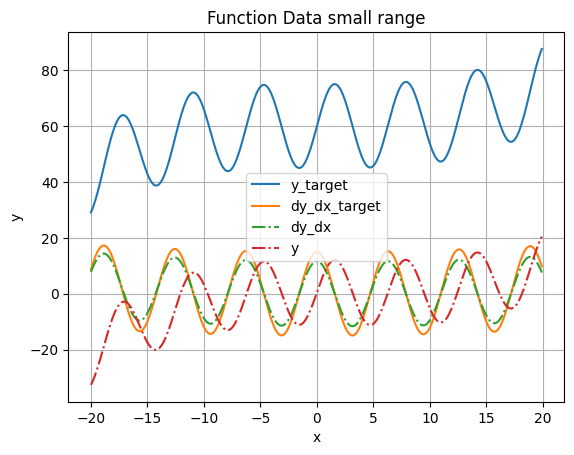

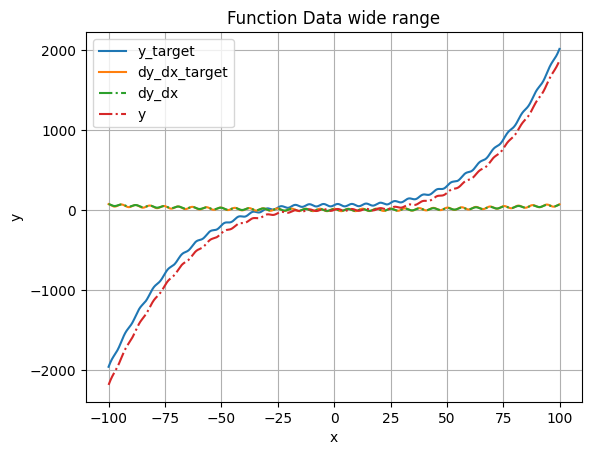

In [6]:
sobolev.neuralizeModel(clear_model=True)
sobolev.trainModel(num_of_epochs=5000,lr=0.02,minimize_gain={'err':0, 'sob_err':1})
res.showResults()

Train the model that works only on the value of the function

================================ nnodely Model =================================
{'Constants': {},
 'Functions': {'FParamFun4': {'code': 'def parametric_fun(x,a,b,c,d):\n'
                                      '    import torch\n'
                                      '    return '
                                      'x**3*a+x**2*b+torch.sin(x)*c+d\n',
                              'in_dim': [{'dim': 1, 'sw': 1}],
                              'map_over_dim': False,
                              'n_input': 1,
                              'name': 'parametric_fun',
                              'params_and_consts': ['FParamFun4a',
                                                    'FParamFun4b',
                                                    'FParamFun4c',
                                                    'FParamFun4d']}},
 'Info': {'SampleTime': 1,
          'nnodely_version': '1.3.1',
          'ns': [1, 0],
          'ntot': 1,
          'num_parameters': 4},
 'Inputs': {'d

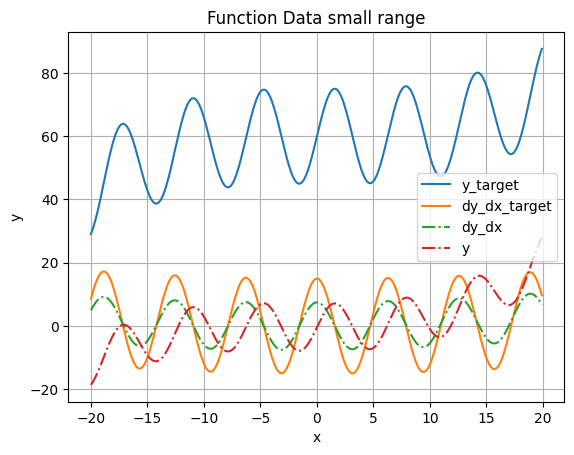

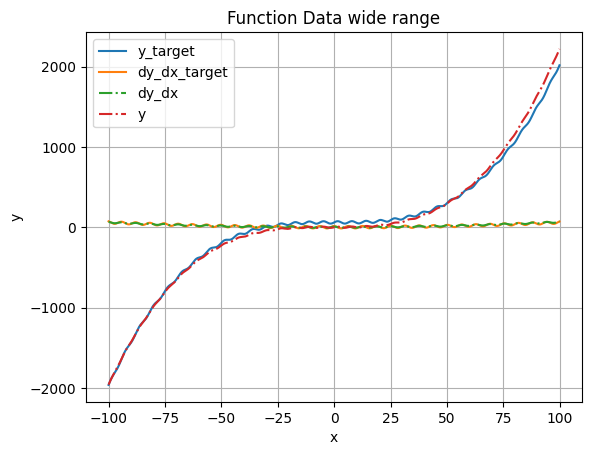

In [7]:
sobolev.neuralizeModel(clear_model=True)
sobolev.trainModel(num_of_epochs=5000, lr=0.02, minimize_gain={'err':1,'sob_err':0})
res.showResults()

Train the model that works minimizing the loss on the value and on the derivative

================================ nnodely Model =================================
{'Constants': {},
 'Functions': {'FParamFun4': {'code': 'def parametric_fun(x,a,b,c,d):\n'
                                      '    import torch\n'
                                      '    return '
                                      'x**3*a+x**2*b+torch.sin(x)*c+d\n',
                              'in_dim': [{'dim': 1, 'sw': 1}],
                              'map_over_dim': False,
                              'n_input': 1,
                              'name': 'parametric_fun',
                              'params_and_consts': ['FParamFun4a',
                                                    'FParamFun4b',
                                                    'FParamFun4c',
                                                    'FParamFun4d']}},
 'Info': {'SampleTime': 1,
          'nnodely_version': '1.3.1',
          'ns': [1, 0],
          'ntot': 1,
          'num_parameters': 4},
 'Inputs': {'d

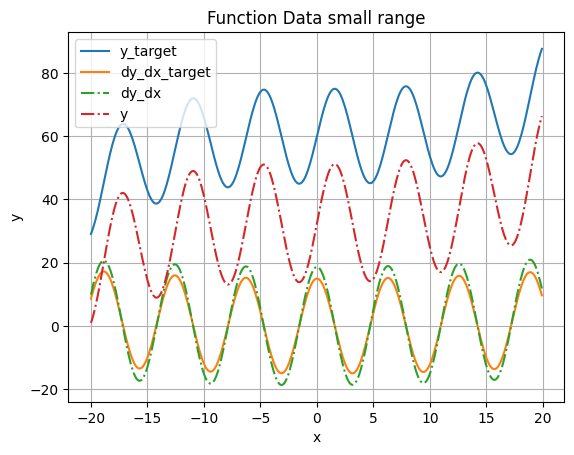

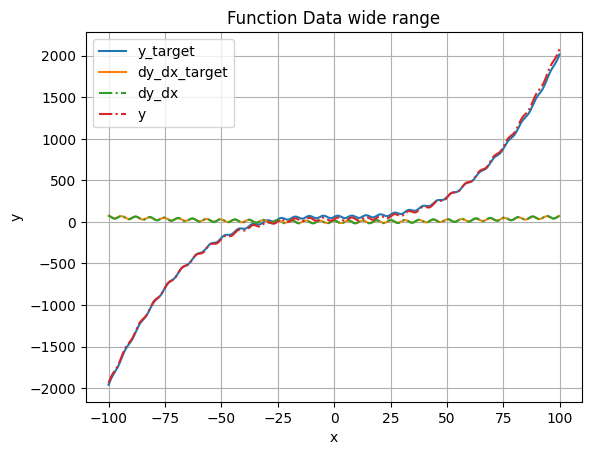

In [8]:
sobolev.neuralizeModel(clear_model=True)
sobolev.trainModel(num_of_epochs=5000, lr=0.02, minimize_gain={'err':1,'sob_err':1})
res.showResults()